In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [7]:

datagen.fit(x_train)

In [8]:
model = models.Sequential()

In [13]:
model = models.Sequential()

# Input Layer
model.add(layers.Input(shape=(32,32,3)))

# First Conv Block
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Second Conv Block
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Third Conv Block
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=6,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 119ms/step - accuracy: 0.2224 - loss: 2.0496 - val_accuracy: 0.4442 - val_loss: 1.5033
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.4124 - loss: 1.5958 - val_accuracy: 0.5251 - val_loss: 1.3119
Epoch 3/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.4763 - loss: 1.4550 - val_accuracy: 0.5204 - val_loss: 1.3292
Epoch 4/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.4990 - loss: 1.3930 - val_accuracy: 0.5820 - val_loss: 1.1768
Epoch 5/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.5255 - loss: 1.3265 - val_accuracy: 0.6099 - val_loss: 1.1154
Epoch 6/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.5445 - loss: 1.2715 - val_accuracy: 0.6311 - val_loss: 1.0513


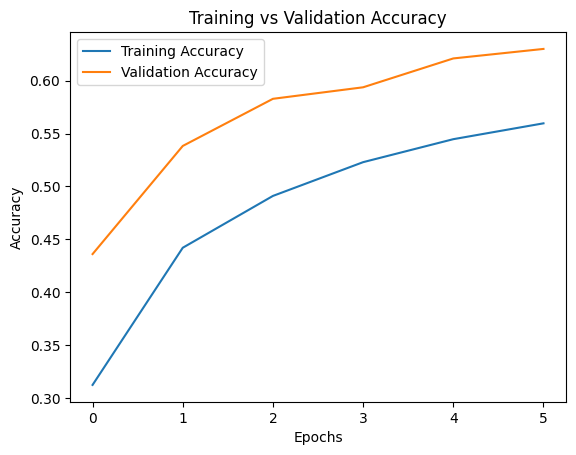

In [12]:

# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
